In [3]:
import pandas as pd

In [109]:
df = pd.read_csv("Data_Train.csv")

In [110]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# One-hot-encoding Airline column using pandas

In [111]:
df['Airline'].describe()

count            2671
unique             11
top       Jet Airways
freq              897
Name: Airline, dtype: object

In [113]:
# Getting a new data frame consisting of all unique names of airline as column

dummies = pd.get_dummies(df.Airline)
dummies.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [114]:
# merging dummy dataFrame with original
merged = pd.concat([df,dummies],axis="columns")
merged.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,0,0,0,1,0,0,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,0,0,0,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,0,0,0,0,0,0,0,0,0,0


# Bam, that was good! now dropping the original Airline column and also one of the dummy variable column

In [115]:
# To escape dummy variable trap, we need to drop one of the dummy variable

final = merged.drop(['Airline', 'Multiple carriers Premium economy'],axis='columns')
final.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,SpiceJet,Vistara,Vistara Premium economy
0,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,0,1,0,0,0,0,0
1,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,0,1,0,0,0,0,0
3,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,0,0,0,1,0,0,0
4,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,0,0,0,0,0,0,0


# One-hot-encoding source and destination

In [116]:
final['Source'].describe()

count      2671
unique        5
top       Delhi
freq       1145
Name: Source, dtype: object

In [117]:
# Getting dummy dataFrame for Source and Destination
dummies_source = pd.get_dummies(final.Source)
dummies_dest = pd.get_dummies(final.Destination)

In [118]:
# Merging the dummy variables and dropping one  from each.. DROPPED: BANGLORE
merged = pd.concat([final, dummies_source],axis="columns")
final = merged.drop(['Source','Banglore'],axis="columns")
merged = pd.concat([final, dummies_dest],axis="columns")
final = merged.drop(['Destination','Banglore'],axis="columns")
final.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
df = final
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# Handling dates by panadas datatime dtype

In [120]:
temp = pd.to_datetime(df.Date_of_Journey)
temp.head()

0   2019-06-06
1   2019-12-05
2   2019-05-21
3   2019-05-21
4   2019-06-24
Name: Date_of_Journey, dtype: datetime64[ns]

In [121]:
# https://stackoverflow.com/questions/45566406/return-a-pandas-series-of-date-time-in-chronological-order-by-the-original-serie

# Taken from stackoverflow, ranking the dates in chronological order and taking their index as value
a = temp.rank(method='dense').sub(1).astype(int)
a.head()

0    26
1    38
2    20
3    20
4    30
Name: Date_of_Journey, dtype: int64

In [122]:
df['Date_of_Journey'] = a
df.head()

/home/codestacker/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [392]:
# Doing same thing to departure and arrival time
# Arrival time contains some dates with it but I'm ignoring those so i need to do some extra work of splitting

In [123]:
temp_dep = pd.to_datetime(df.Dep_Time)
temp_dep.head()

0   2019-03-11 17:30:00
1   2019-03-11 06:20:00
2   2019-03-11 19:15:00
3   2019-03-11 08:00:00
4   2019-03-11 23:55:00
Name: Dep_Time, dtype: datetime64[ns]

In [124]:
temp_arr = pd.to_datetime(df.Arrival_Time)
temp_arr.head()

0   2019-06-07 04:25:00
1   2019-03-11 10:20:00
2   2019-05-22 19:00:00
3   2019-03-11 21:00:00
4   2019-06-25 02:45:00
Name: Arrival_Time, dtype: datetime64[ns]

In [125]:
temp_dep = temp_dep.rank(method="dense").sub(1).astype(int)
temp_dep.head()

0    138
1     31
2    156
3     48
4    198
Name: Dep_Time, dtype: int64

In [126]:
temp_arr = [(i.split())[0] for i in df.Arrival_Time]
temp_arr[:10]

['04:25',
 '10:20',
 '19:00',
 '21:00',
 '02:45',
 '12:35',
 '22:35',
 '20:30',
 '12:55',
 '22:35']

In [127]:
temp_arr = pd.DataFrame(temp_arr)
temp_arr.head()

,0
0,04:25
1,10:20
2,19:00
3,21:00
4,02:45


In [128]:
temp_arr = pd.to_datetime(temp_arr[0])
temp_arr.head()

0   2019-03-11 04:25:00
1   2019-03-11 10:20:00
2   2019-03-11 19:00:00
3   2019-03-11 21:00:00
4   2019-03-11 02:45:00
Name: 0, dtype: datetime64[ns]

In [129]:
temp_arr = temp_arr.rank(method="dense").sub(1).astype(int)
temp_arr.head()

0     25
1     67
2    154
3    172
4     17
Name: 0, dtype: int64

In [130]:
df.Dep_Time = temp_dep
df.Arrival_Time = temp_arr

In [131]:
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,138,25,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,31,67,4h,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,156,154,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,48,172,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,198,17,2h 50m,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Coverting duration to timedelta objects and the replacing them with their minutes equivalent

In [132]:
# Duration of flight is converted to total seconds then divided by 60 to get total minutes
temp = pd.to_timedelta(df.Duration)
temp.describe()

count                      2671
mean     0 days 10:39:44.500187
std      0 days 08:22:11.215776
min             0 days 00:05:00
25%             0 days 02:55:00
50%             0 days 08:40:00
75%             0 days 15:15:00
max             1 days 16:40:00
Name: Duration, dtype: object

In [133]:
temp = temp.dt.total_seconds()
temp.describe()

count      2671.000000
mean      38384.500187
std       30131.215776
min         300.000000
25%       10500.000000
50%       31200.000000
75%       54900.000000
max      146400.000000
Name: Duration, dtype: float64

In [134]:
temp = temp.divide(60)
temp.head()

0     655.0
1     240.0
2    1425.0
3     780.0
4     170.0
Name: Duration, dtype: float64

In [135]:
df.Duration = temp
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,138,25,655.0,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,31,67,240.0,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,156,154,1425.0,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,48,172,780.0,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,198,17,170.0,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [136]:
# Total Stop is categorical ordinal data. So I'm giving them an order
df.Total_Stops = df.Total_Stops.fillna('non-stop')
df.isnull().any()

Date_of_Journey            False
Route                      False
Dep_Time                   False
Arrival_Time               False
Duration                   False
Total_Stops                False
Additional_Info            False
Air Asia                   False
Air India                  False
GoAir                      False
IndiGo                     False
Jet Airways                False
Jet Airways Business       False
Multiple carriers          False
SpiceJet                   False
Vistara                    False
Vistara Premium economy    False
Chennai                    False
Delhi                      False
Kolkata                    False
Mumbai                     False
Cochin                     False
Delhi                      False
Hyderabad                  False
Kolkata                    False
New Delhi                  False
dtype: bool

In [138]:
uniques = list(df.Total_Stops.unique())
uniques.sort() # popping out the 'non-stop' item and inserting '0 stop at start'
uniques.pop() # I can do this because i know how the sorted list is going to look. i.e. non-stop is going to be at the end
uniques.insert(0,'0 stop')
uniques

['0 stop', '1 stop', '2 stops', '3 stops', '4 stops']

In [139]:
df.Total_Stops = pd.Categorical(df.Total_Stops,uniques,ordered=True)
df.Total_Stops.head()

0    1 stop
1    1 stop
2    1 stop
3    1 stop
4       NaN
Name: Total_Stops, dtype: category
Categories (5, object): [0 stop < 1 stop < 2 stops < 3 stops < 4 stops]

In [140]:
# There are NaN values because non-stop value was not in the unique list but that's just
# equivalent to 0 stop so replacing -1(the categorical code for NaN) with 0
df.Total_Stops = df.Total_Stops.cat.codes.replace(-1,0)
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,138,25,655.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,31,67,240.0,1,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,156,154,1425.0,1,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,48,172,780.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,198,17,170.0,0,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [141]:
# Sorting the list of Routes on the basis of their length and then replacing the route with it's index in the sorted list
df.Route = df.Route.fillna('0')

Route = list(set(path for path in df.Route))
Route.sort(key=len)

In [142]:
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,138,25,655.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,31,67,240.0,1,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,156,154,1425.0,1,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,48,172,780.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,198,17,170.0,0,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [143]:
temp = df.Route.copy()
for i in temp.index:
    temp.loc[i] = Route.index(temp.loc[i])

In [144]:
df.Route = temp
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,12,138,25,655.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,37,31,67,240.0,1,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,12,156,154,1425.0,1,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,12,48,172,780.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,0,198,17,170.0,0,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [145]:
# Another categorical nominal data.. So One-Hot-Encoding
df.Additional_Info.describe()

count        2671
unique          6
top       No info
freq         2148
Name: Additional_Info, dtype: object

In [146]:
print df.Additional_Info.unique()

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Business class' 'Change airports']


In [147]:
df.Additional_Info = df.Additional_Info.replace('No info','No Info')

In [148]:
dummies = pd.get_dummies(df.Additional_Info)
dummies.head()

,1 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [149]:
merged = pd.concat([df,dummies],axis="columns")
df = merged.drop(["Additional_Info", "No Info"],axis="columns")
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Air Asia,Air India,GoAir,IndiGo,...,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included
0,26,12,138,25,655.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,38,37,31,67,240.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20,12,156,154,1425.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,20,12,48,172,780.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,30,0,198,17,170.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [150]:
df.to_csv("data_clean.csv")

# Doing exactly the same for test data..
# So I have copied the cell from above but changed the file names

In [109]:
df = pd.read_csv("Test_set.csv")

In [110]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# One-hot-encoding Airline column using pandas

In [111]:
df['Airline'].describe()

count            2671
unique             11
top       Jet Airways
freq              897
Name: Airline, dtype: object

In [113]:
# Getting a new data frame consisting of all unique names of airline as column

dummies = pd.get_dummies(df.Airline)
dummies.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [114]:
# merging dummy dataFrame with original
merged = pd.concat([df,dummies],axis="columns")
merged.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,0,0,0,1,0,0,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,0,0,0,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,0,0,0,0,0,0,0,0,0,0


# Bam, that was good! now dropping the original Airline column and also one of the dummy variable column

In [115]:
# To escape dummy variable trap, we need to drop one of the dummy variable

final = merged.drop(['Airline', 'Multiple carriers Premium economy'],axis='columns')
final.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,SpiceJet,Vistara,Vistara Premium economy
0,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,0,1,0,0,0,0,0
1,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,0,1,0,0,0,0,0
3,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,0,0,0,1,0,0,0
4,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,0,0,0,0,0,0,0


# One-hot-encoding source and destination

In [116]:
final['Source'].describe()

count      2671
unique        5
top       Delhi
freq       1145
Name: Source, dtype: object

In [117]:
# Getting dummy dataFrame for Source and Destination
dummies_source = pd.get_dummies(final.Source)
dummies_dest = pd.get_dummies(final.Destination)

In [118]:
# Merging the dummy variables and dropping one  from each.. DROPPED: BANGLORE
merged = pd.concat([final, dummies_source],axis="columns")
final = merged.drop(['Source','Banglore'],axis="columns")
merged = pd.concat([final, dummies_dest],axis="columns")
final = merged.drop(['Destination','Banglore'],axis="columns")
final.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
df = final
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# Handling dates by panadas datatime dtype

In [120]:
temp = pd.to_datetime(df.Date_of_Journey)
temp.head()

0   2019-06-06
1   2019-12-05
2   2019-05-21
3   2019-05-21
4   2019-06-24
Name: Date_of_Journey, dtype: datetime64[ns]

In [121]:
# https://stackoverflow.com/questions/45566406/return-a-pandas-series-of-date-time-in-chronological-order-by-the-original-serie

# Taken from stackoverflow, ranking the dates in chronological order and taking their index as value
a = temp.rank(method='dense').sub(1).astype(int)
a.head()

0    26
1    38
2    20
3    20
4    30
Name: Date_of_Journey, dtype: int64

In [122]:
df['Date_of_Journey'] = a
df.head()

/home/codestacker/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [392]:
# Doing same thing to departure and arrival time
# Arrival time contains some dates with it but I'm ignoring those so i need to do some extra work of splitting

In [123]:
temp_dep = pd.to_datetime(df.Dep_Time)
temp_dep.head()

0   2019-03-11 17:30:00
1   2019-03-11 06:20:00
2   2019-03-11 19:15:00
3   2019-03-11 08:00:00
4   2019-03-11 23:55:00
Name: Dep_Time, dtype: datetime64[ns]

In [124]:
temp_arr = pd.to_datetime(df.Arrival_Time)
temp_arr.head()

0   2019-06-07 04:25:00
1   2019-03-11 10:20:00
2   2019-05-22 19:00:00
3   2019-03-11 21:00:00
4   2019-06-25 02:45:00
Name: Arrival_Time, dtype: datetime64[ns]

In [125]:
temp_dep = temp_dep.rank(method="dense").sub(1).astype(int)
temp_dep.head()

0    138
1     31
2    156
3     48
4    198
Name: Dep_Time, dtype: int64

In [126]:
temp_arr = [(i.split())[0] for i in df.Arrival_Time]
temp_arr[:10]

['04:25',
 '10:20',
 '19:00',
 '21:00',
 '02:45',
 '12:35',
 '22:35',
 '20:30',
 '12:55',
 '22:35']

In [127]:
temp_arr = pd.DataFrame(temp_arr)
temp_arr.head()

,0
0,04:25
1,10:20
2,19:00
3,21:00
4,02:45


In [128]:
temp_arr = pd.to_datetime(temp_arr[0])
temp_arr.head()

0   2019-03-11 04:25:00
1   2019-03-11 10:20:00
2   2019-03-11 19:00:00
3   2019-03-11 21:00:00
4   2019-03-11 02:45:00
Name: 0, dtype: datetime64[ns]

In [129]:
temp_arr = temp_arr.rank(method="dense").sub(1).astype(int)
temp_arr.head()

0     25
1     67
2    154
3    172
4     17
Name: 0, dtype: int64

In [130]:
df.Dep_Time = temp_dep
df.Arrival_Time = temp_arr

In [131]:
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,138,25,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,31,67,4h,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,156,154,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,48,172,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,198,17,2h 50m,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Coverting duration to timedelta objects and the replacing them with their minutes equivalent

In [132]:
# Duration of flight is converted to total seconds then divided by 60 to get total minutes
temp = pd.to_timedelta(df.Duration)
temp.describe()

count                      2671
mean     0 days 10:39:44.500187
std      0 days 08:22:11.215776
min             0 days 00:05:00
25%             0 days 02:55:00
50%             0 days 08:40:00
75%             0 days 15:15:00
max             1 days 16:40:00
Name: Duration, dtype: object

In [133]:
temp = temp.dt.total_seconds()
temp.describe()

count      2671.000000
mean      38384.500187
std       30131.215776
min         300.000000
25%       10500.000000
50%       31200.000000
75%       54900.000000
max      146400.000000
Name: Duration, dtype: float64

In [134]:
temp = temp.divide(60)
temp.head()

0     655.0
1     240.0
2    1425.0
3     780.0
4     170.0
Name: Duration, dtype: float64

In [135]:
df.Duration = temp
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,138,25,655.0,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,31,67,240.0,1 stop,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,156,154,1425.0,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,48,172,780.0,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,198,17,170.0,non-stop,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [136]:
# Total Stop is categorical ordinal data. So I'm giving them an order
df.Total_Stops = df.Total_Stops.fillna('non-stop')
df.isnull().any()

Date_of_Journey            False
Route                      False
Dep_Time                   False
Arrival_Time               False
Duration                   False
Total_Stops                False
Additional_Info            False
Air Asia                   False
Air India                  False
GoAir                      False
IndiGo                     False
Jet Airways                False
Jet Airways Business       False
Multiple carriers          False
SpiceJet                   False
Vistara                    False
Vistara Premium economy    False
Chennai                    False
Delhi                      False
Kolkata                    False
Mumbai                     False
Cochin                     False
Delhi                      False
Hyderabad                  False
Kolkata                    False
New Delhi                  False
dtype: bool

In [138]:
uniques = list(df.Total_Stops.unique())
uniques.sort() # popping out the 'non-stop' item and inserting '0 stop at start'
uniques.pop() # I can do this because i know how the sorted list is going to look. i.e. non-stop is going to be at the end
uniques.insert(0,'0 stop')
uniques

['0 stop', '1 stop', '2 stops', '3 stops', '4 stops']

In [139]:
df.Total_Stops = pd.Categorical(df.Total_Stops,uniques,ordered=True)
df.Total_Stops.head()

0    1 stop
1    1 stop
2    1 stop
3    1 stop
4       NaN
Name: Total_Stops, dtype: category
Categories (5, object): [0 stop < 1 stop < 2 stops < 3 stops < 4 stops]

In [140]:
# There are NaN values because non-stop value was not in the unique list but that's just
# equivalent to 0 stop so replacing -1(the categorical code for NaN) with 0
df.Total_Stops = df.Total_Stops.cat.codes.replace(-1,0)
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,138,25,655.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,31,67,240.0,1,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,156,154,1425.0,1,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,48,172,780.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,198,17,170.0,0,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [141]:
# Sorting the list of Routes on the basis of their length and then replacing the route with it's index in the sorted list
df.Route = df.Route.fillna('0')

Route = list(set(path for path in df.Route))
Route.sort(key=len)

In [142]:
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,DEL → BOM → COK,138,25,655.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,CCU → MAA → BLR,31,67,240.0,1,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,DEL → BOM → COK,156,154,1425.0,1,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,DEL → BOM → COK,48,172,780.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,BLR → DEL,198,17,170.0,0,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [143]:
temp = df.Route.copy()
for i in temp.index:
    temp.loc[i] = Route.index(temp.loc[i])

In [144]:
df.Route = temp
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,26,12,138,25,655.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,38,37,31,67,240.0,1,No info,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,20,12,156,154,1425.0,1,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20,12,48,172,780.0,1,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,30,0,198,17,170.0,0,No info,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [145]:
# Another categorical nominal data.. So One-Hot-Encoding
df.Additional_Info.describe()

count        2671
unique          6
top       No info
freq         2148
Name: Additional_Info, dtype: object

In [146]:
print df.Additional_Info.unique()

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Business class' 'Change airports']


In [147]:
df.Additional_Info = df.Additional_Info.replace('No info','No Info')

In [148]:
dummies = pd.get_dummies(df.Additional_Info)
dummies.head()

,1 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [149]:
merged = pd.concat([df,dummies],axis="columns")
df = merged.drop(["Additional_Info", "No Info"],axis="columns")
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Air Asia,Air India,GoAir,IndiGo,...,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included
0,26,12,138,25,655.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,38,37,31,67,240.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20,12,156,154,1425.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,20,12,48,172,780.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,30,0,198,17,170.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [150]:
df.to_csv("test_clean.csv")

## Finally I think I'm done with the processing of data.. so now i can start visualising data and training my model

In [359]:
df = pd.read_csv('data_clean.csv')
import seaborn as sns
%matplotlib inline

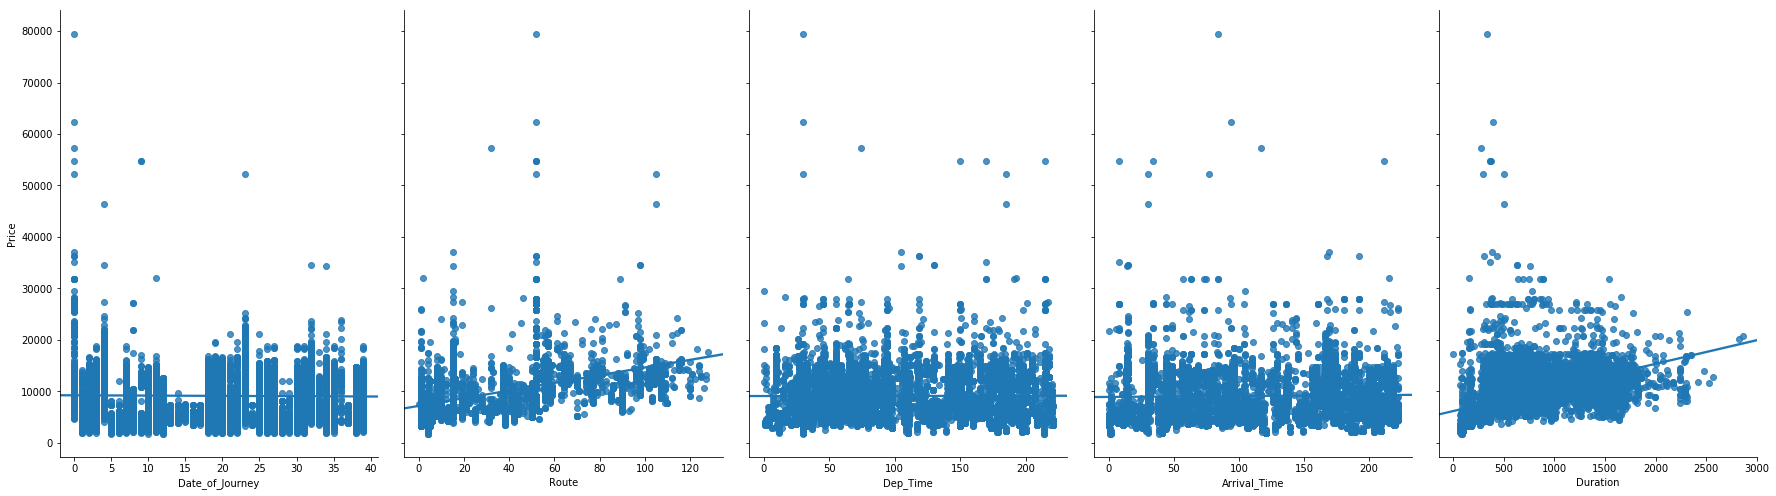

In [360]:
sns.pairplot(df,x_vars=list(df.columns.drop(['Price','Unnamed: 0']))[:5],y_vars='Price',height=7,aspect=0.7,kind='reg')

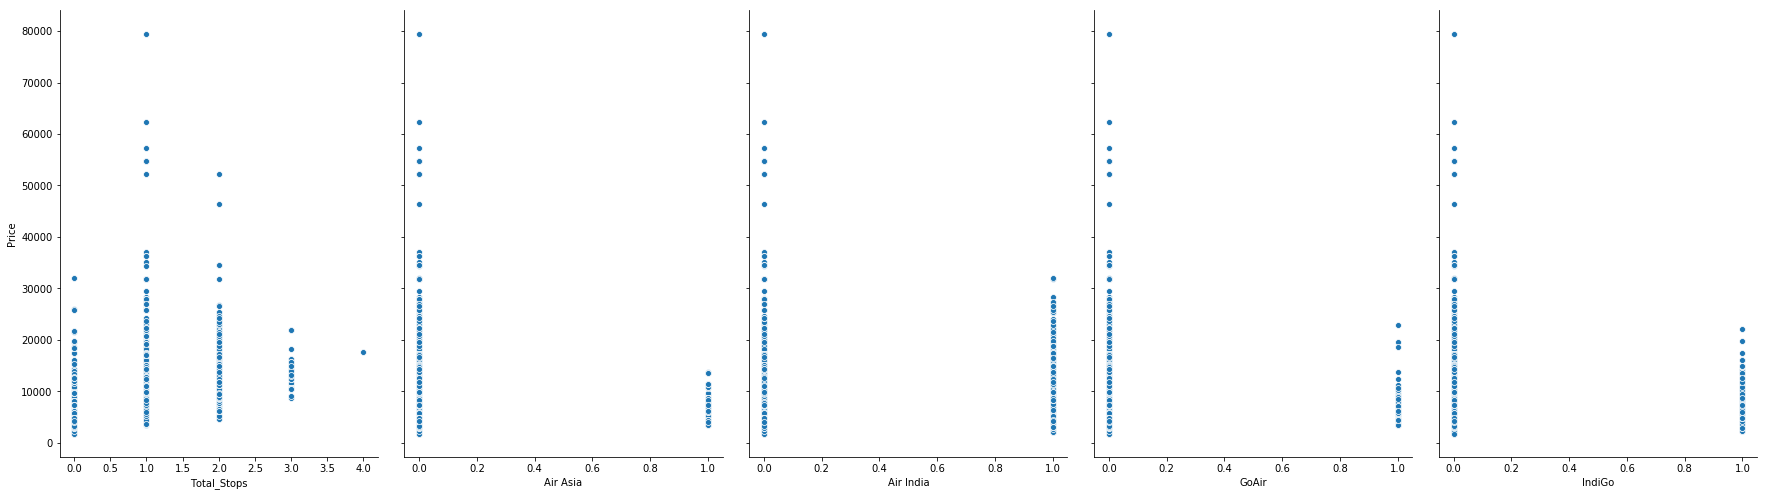

In [361]:
sns.pairplot(df,x_vars=list(df.columns.drop(['Price','Unnamed: 0']))[5:10],y_vars='Price',height=7,aspect=0.7)

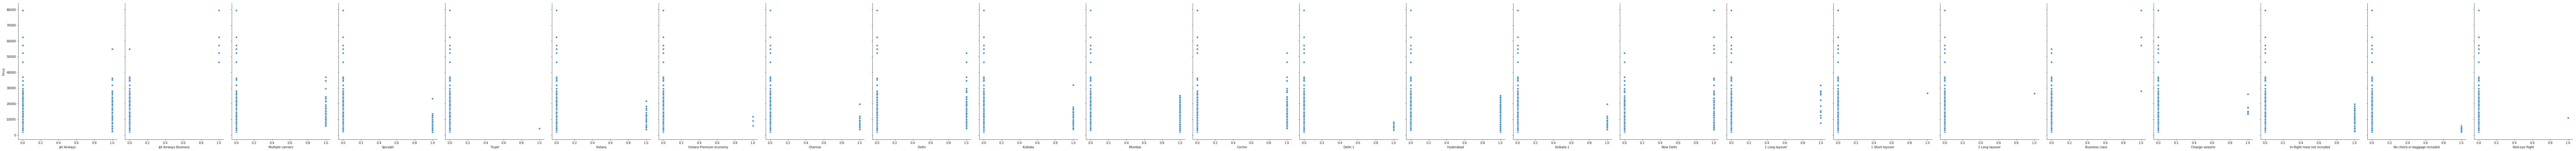

In [362]:
sns.pairplot(df,x_vars=list(df.columns.drop(['Price','Unnamed: 0']))[10:],y_vars='Price',height=7,aspect=0.7)

# Using sklearn to split data in training and testing data for cross validation

In [363]:
from sklearn.model_selection import train_test_split

In [364]:
X = df.drop(["Unnamed: 0","Price"],axis="columns")
Y = df['Price']

In [365]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [366]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [367]:
linreg.intercept_

8161.300857837084

In [368]:
linreg.coef_

array([-1.33687330e+01, -2.19338742e+01,  1.75888645e+00, -1.59220847e+00,
        7.21427282e-02,  3.47140128e+03, -3.54710489e+03, -1.59014456e+03,
       -3.28284090e+03, -3.08580231e+03,  2.77542010e+03,  4.04610341e+04,
        3.80378944e+02, -3.54103432e+03, -4.81062387e+03, -1.36302939e+03,
        5.97798112e+02,  6.95437517e+00, -1.06208009e+02, -1.91396260e+02,
       -8.50441992e+02, -1.06208009e+02, -1.05932548e+03, -8.50441992e+02,
        6.95437517e+00,  2.20041736e+03,  8.41028412e+03,  1.31928297e+04,
        0.00000000e+00,  1.42101174e+04,  3.75525467e+03, -3.62708400e+03,
       -3.93271684e+02,  3.71028841e+03])

In [369]:
Y_pred = linreg.predict(X_test)

In [370]:
Y_pred[1:10]

array([ 6679.80515576, 13194.01903415, 15679.07131167,  9697.07289631,
       10996.87565187,  4986.21413376, 11252.44353213, 10022.43448092,
        3604.40458143])

In [371]:
Y_test.head()

7931     2753
5468     6309
8618    13731
3836    13555
7771    10844
Name: Price, dtype: int64

In [372]:
from sklearn import metrics
print np.sqrt(metrics.mean_squared_log_error(Y_test,Y_pred))

0.26278368188700063


# Making predictions on the test dataset and then I'm gonna submit my predictions.. Let's see...

In [373]:
df = pd.read_csv("test_clean.csv")
df.head()

,Unnamed: 0,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Air Asia,Air India,GoAir,...,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included
0,0,26,12,138,25,655.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,38,37,31,67,240.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,20,12,156,154,1425.0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,3,20,12,48,172,780.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,30,0,198,17,170.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [374]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Air Asia,Air India,GoAir,IndiGo,...,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included
0,26,12,138,25,655.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,38,37,31,67,240.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20,12,156,154,1425.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,20,12,48,172,780.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,30,0,198,17,170.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [375]:
X_train.shape

(8012, 34)

In [376]:
df.shape

(2671, 30)

In [377]:
trainCols = set(X_train.columns)

In [378]:
testCols = set(df.columns)

In [379]:
# number of columns are different so we retrain our model without those columns
extraCols = trainCols - testCols
len(extraCols)

4

In [380]:
X = X.drop(extraCols,axis=1)

In [388]:
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [382]:
prediction = pd.Series(linreg.predict(df))
prediction.head()

0    13818.399308
1     7043.551143
2    10129.390682
3    11167.666853
4     3495.203500
dtype: float64

In [383]:
prediction = prediction.astype(int)

In [349]:
prediction.to_excel('prediction.xlsx')

In [384]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [389]:
linreg_cross = LinearRegression()
linreg_cross.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [390]:
Y_pred = linreg.predict(X_test)

In [391]:
print np.sqrt(metrics.mean_squared_log_error(Y_test,Y_pred))

0.2618362589176982
